In [1]:
import numpy as np
from utilities import visualize_result, show, get_test_data
import matplotlib.pyplot as plt
from HopfieldNetwork import HopfieldNetwork, LearningRule, Mode
from data_manager import *

In [2]:
data, sample_count_m, neurons_count_n, height, width = get_set_large_25x25()

In [3]:
random_seed = 123

In [4]:
network = HopfieldNetwork(LearningRule.Oja, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
T_Oja = network.get_weights(0.001, 100)

In [5]:
random_generator = np.random.default_rng(seed=random_seed)
noise_percentage = 0.1
noise_changes_count = int(noise_percentage * neurons_count_n)
network.set_mode(Mode.Synchronous)

images = []
noised_images = []
results = []

for i in range(0, sample_count_m):
    sample_id = i

    sample = np.reshape(data[:, sample_id], (neurons_count_n, 1))
    images.append(sample)
    
    sample_test = get_test_data(np.copy(sample), noise_changes_count, random_generator)
    noised_images.append(sample_test)
    
    result_synchronous = network.recognize(T_Oja, np.copy(sample_test), 1000)
    results.append(result_synchronous)
    
    print("Accuracy synchronous: {0}".format(np.sum(sample == result_synchronous) / neurons_count_n))

Model convergence at 3 iter
Accuracy synchronous: 1.0
Model convergence at 3 iter
Accuracy synchronous: 1.0
Model convergence at 3 iter
Accuracy synchronous: 1.0
Model convergence at 3 iter
Accuracy synchronous: 1.0
Model convergence at 3 iter
Accuracy synchronous: 1.0
Model convergence at 3 iter
Accuracy synchronous: 1.0


In [6]:
def plot_results(images, noised_images, results, m):
    fig, axes = plt.subplots(m, 3, figsize=(10, 20))
    for i in range(0, m):
        axes[i, 0].imshow(images[i].reshape(height, width), cmap='gray')
        axes[i, 1].imshow(noised_images[i].reshape(height, width), cmap='gray')
        axes[i, 2].imshow(results[i].reshape(height, width), cmap='gray')
        axes[i, 0].set_xticks([])
        axes[i, 1].set_xticks([])
        axes[i, 2].set_xticks([])
        axes[i, 0].set_yticks([])
        axes[i, 1].set_yticks([])
        axes[i, 2].set_yticks([])

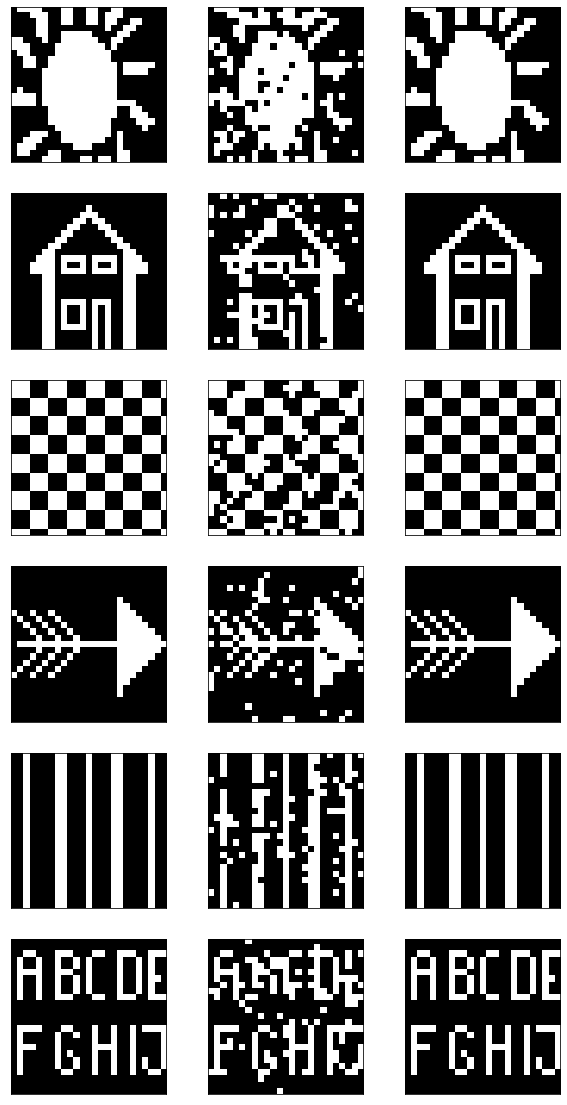

In [7]:
plot_results(images, noised_images, results, sample_count_m)